In [11]:
import pandas as pd 
import numpy  as np
import seaborn as sea
import matplotlib.pyplot as plt

In [12]:
#test  = pd.read_csv(r'datasets/MobilePricePrediction/test.csv',sep=',')
dataset = train = pd.read_csv(r'datasets/MobilePricePrediction/train.csv',sep=',')

test não tem o preços dos smartphones então será ignorado

&nbsp;

## Analise

In [13]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [14]:
dataset.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


In [15]:
dataset.shape

(2000, 21)

In [16]:
dataset.nunique()

battery_power    1094
blue                2
clock_speed        26
dual_sim            2
fc                 20
four_g              2
int_memory         63
m_dep              10
mobile_wt         121
n_cores             8
pc                 21
px_height        1137
px_width         1109
ram              1562
sc_h               15
sc_w               19
talk_time          19
three_g             2
touch_screen        2
wifi                2
price_range         4
dtype: int64

&nbsp;

In [17]:
class SelectType:
    def __init__(self, data:pd.DataFrame):
        self.data = data
        self.tuples = self.data.nunique().reset_index().iterrows()

    def Atributes(self):
        return self.Binaries()
    
    def Binaries(self):
        binaryList = list()
        numberList = list()
        for tupla in self.tuples:
            counter = tupla[1].values[1]
            column  = tupla[1].values[0] 
            if counter == 2:
                binaryList.append(column)
            
            if counter != 2:
                if self.data[column].dtype == np.float64 or self.data[column].dtype == np.int64:
                    numberList.append(column)
            
        return binaryList, numberList

In [18]:
from scipy.stats import chi2_contingency, pointbiserialr

class Correlation:
    M_ = None
    
    def __init__(self, column1:list, column2:list, data:pd.DataFrame):
        self.columnNames1 = column1
        self.columnNames2 = column2
        self.data         = data
        self.tupla        = ( len(self.columnNames1) , len(self.columnNames2) ) 

    def quiQuadrada(self):
        self.M_ = np.zeros(shape=self.tupla)

        for enumI, i in enumerate(self.columnNames1):
            for enumJ, j in enumerate(self.columnNames2):
                chi, p, _, _ = chi2_contingency( pd.crosstab(self.data[i].values, self.data[j].values) )
                self.M_[enumI,enumJ] = p
        
        return pd.DataFrame(self.M_, columns=self.columnNames1, index=self.columnNames2)

    def pointBisserl(self):
        self.M_ = np.zeros(shape=self.tupla)
        for enumI, i in enumerate(self.columnNames1):
            for enumJ, j in enumerate(self.columnNames2):
                corr, p_value = pointbiserialr(self.data[i].values, self.data[j].values)
              
                self.M_[enumI, enumJ] = p_value
        return pd.DataFrame(self.M_.T, columns=self.columnNames1, index=self.columnNames2)

In [19]:
bini , num =  SelectType(dataset).Atributes()

corr1 = Correlation(bini, num, dataset).pointBisserl()
corr2 = Correlation(bini, bini, dataset).quiQuadrada()

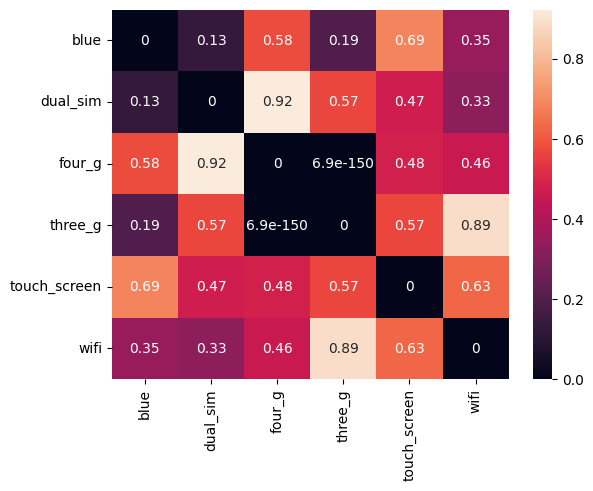

In [20]:
sea.heatmap(corr2,annot=True)
plt.show()

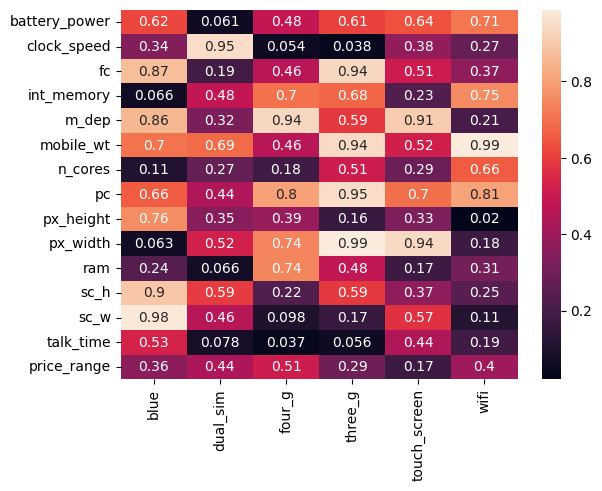

In [21]:
sea.heatmap(corr1, annot=True)
plt.show()

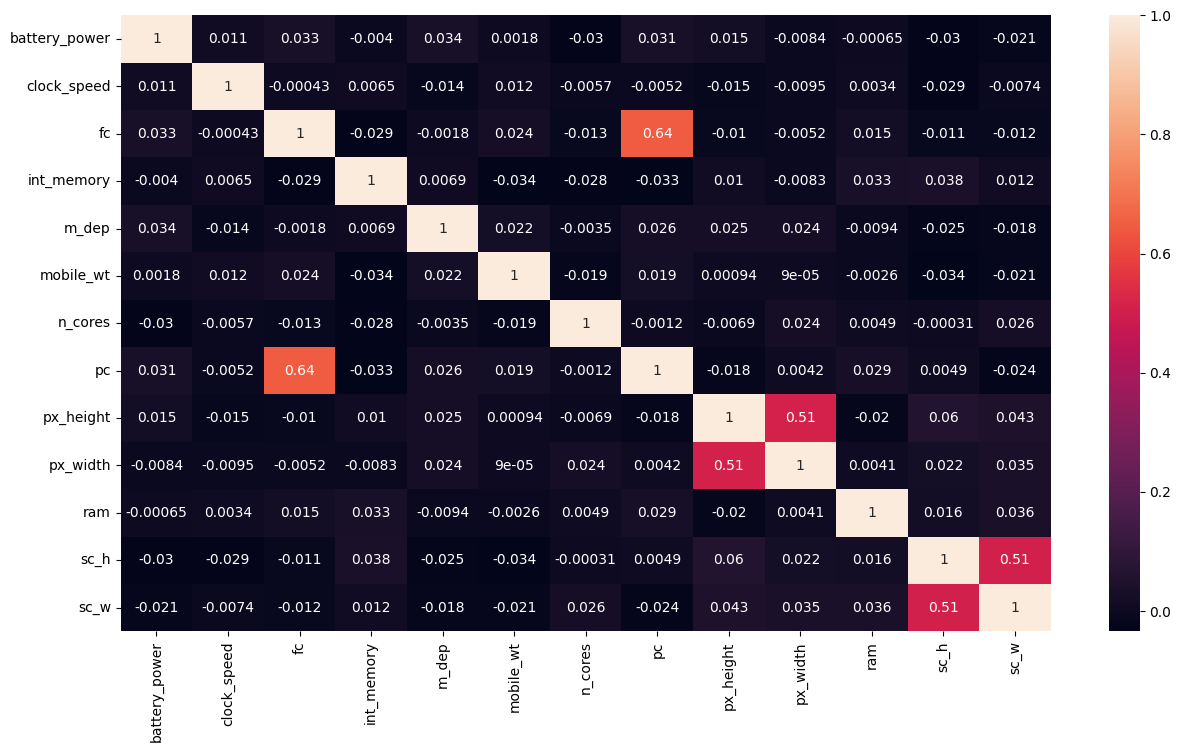

In [32]:
plt.figure(figsize=(15,8))
sea.heatmap( dataset[num[:len(num)-2]].corr(method='pearson'), annot=True)
plt.show()

In [27]:
Correlation(['price_range','n_cores'],['price_range','n_cores'],dataset).quiQuadrada()

,price_range,n_cores
price_range,0.000000,0.488294
n_cores,0.488294,0.000000


&nbsp;

&nbsp;

## Pre-processamento

In [23]:
from sklearn.preprocessing import StandardScaler
from sklearn.base          import TransformerMixin,BaseEstimator

In [24]:
# Padronização dos dados
class Padronizacao(BaseEstimator,TransformerMixin):
    def __init__(self,columns:list | str) -> None:
        self.columns = columns 

    def fit(self,X,y=None):
        return self
    
    def transform(self, X:pd.DataFrame):  
        if ( type(self.columns) == list ):
            X[self.columns]   = StandardScaler().fit_transform(X[self.columns])
        else:
            X[[self.columns]] = StandardScaler().fit_transform(X[[self.columns]])
        return X